In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
plt.gray()

<Figure size 640x480 with 0 Axes>

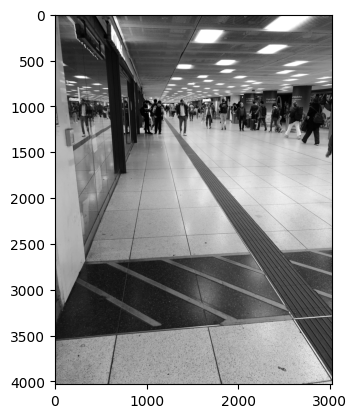

In [11]:
image_path = 'C:\\Users\\leonh\\Documents\\GitHub\\project_bums\\Test_Bilder\\MUC_BHF_1.jpg'
img = cv2.imread(image_path, 0)
plt.imshow(img)

In [20]:
#gauss = cv2.GaussianBlur(img, None, 1)
gauss = img

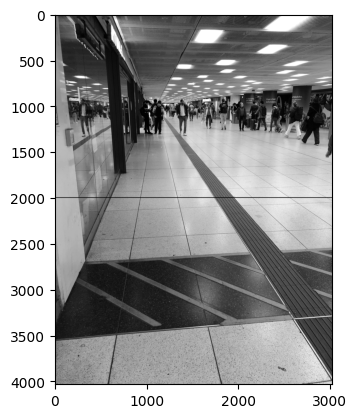

In [14]:
def create_horizontal_line(image, y_position, color=(0, 0, 255), thickness=5):
    line_image = np.array(image)
    cv2.line(line_image, (0, y_position), (image.shape[1], y_position), color, thickness)
    return line_image


y_position = 2000  # Y-Position der horizontalen Linie

line_image = create_horizontal_line(gauss, y_position)

plt.imshow (line_image)


In [1]:
# Histogramm entlang der horizontalen Linie berechnen
histogram = cv2.calcHist([line_image], [0], None, [256], [0, 256])

# Histogramm-Plot erstellen
plt.plot(histogram)

NameError: name 'cv2' is not defined

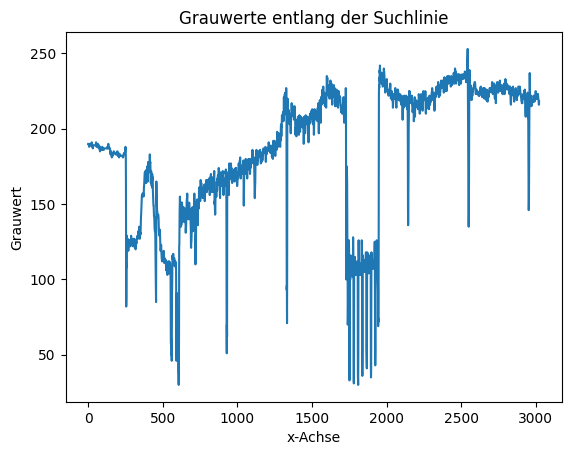

In [16]:
def grayscale_values(image, y_position):
    # Linienbild erstellen
    line_image = create_horizontal_line(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    return gray_values, x_values


# Plot erstellen
def plot_values (gray_values, x_values):
    plt.plot(x_values, gray_values)
    plt.title('Grauwerte entlang der Suchlinie')
    plt.xlabel('x-Achse')
    plt.ylabel('Grauwert')
    plt.show()

gray_values, x_values = grayscale_values(gauss, y_position);
plot_values (gray_values, x_values)

In [40]:
def detect_gray_value_changes(image, y_position, threshold_min=60, threshold_max=150, max_distance=85, min_distance=25):
    # Linienbild erstellen
    line_image = create_horizontal_line(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    # Grauwertänderungen und zugehörige x-Positionen sammeln
    gray_changes = []
    change_positions = []
    prev_value = gray_values[0]
    prev_position_wright = 0
    prev_position = 0

    for i in range(1, len(gray_values)):
        current_value = gray_values[i]
        if threshold_min < abs(current_value - prev_value) < threshold_max:
            
            if min_distance < (i - prev_position) < max_distance:
                gray_changes.append(current_value - prev_value)
                #change_positions.append(i)
                change_positions.append((i))
                prev_value = current_value
                prev_position = i
                prev_position_wright = i
            else : 
                prev_position = i

    return gray_changes, change_positions


gray_changes, change_positions = detect_gray_value_changes(gauss, y_position)

print("Grauwertänderungen: ", gray_changes)
print("Positionen der Änderungen: ", change_positions)


Grauwertänderungen:  [122, 145, 92]
Positionen der Änderungen:  [591, 1388, 1808]


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4428\1783341872.py:22: RuntimeWarning: overflow encountered in scalar subtract
  if threshold_min < abs(current_value - prev_value) < threshold_max:
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4428\1783341872.py:25: RuntimeWarning: overflow encountered in scalar subtract
  gray_changes.append(current_value - prev_value)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4428\3258059718.py:28: RuntimeWarning: overflow encountered in scalar subtract
  if threshold_min < abs(current_value - prev_value) < threshold_max:
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4428\3258059718.py:31: RuntimeWarning: overflow encountered in scalar subtract
  gray_changes.append(current_value - prev_value)


Grauwertänderungen:  [31, 93, 36, 32, 31, 31, 32, 97, 98, 33, 99, 99, 31, 33, 34, 89, 48, 35]
Positionen der Änderungen:  [(1555, 2150), (10701, 2150), (12688, 2150), (12718, 2150), (15382, 2150), (22298, 2150), (25658, 2150), (27833, 2150), (28112, 2150), (30488, 2150), (32050, 2150), (33642, 2150), (34088, 2150), (38038, 2150), (38065, 2150), (38106, 2150), (39805, 2150), (39866, 2150)]


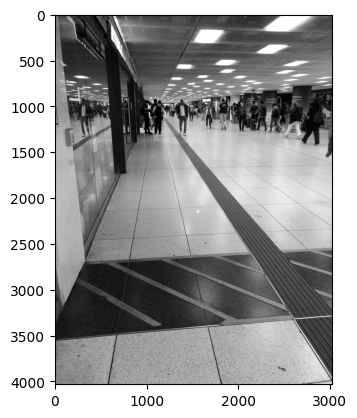

In [41]:
# def create_horizontal_line2(image, y_position, color=(0, 0, 255), thickness=2):
#     line_image = np.copy(image)
#     cv2.line(line_image, (0, y_position), (image.shape[1], y_position), color, thickness)
#     return line_image

def detect_gray_value_changes(image, y_range, threshold_min=30, threshold_max=100, max_distance=85, min_distance=25):
    # Linienbild erstellen
    #line_image = create_horizontal_line2(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    for y_position in y_range:
        # Grauwerte entlang der Linie sammeln
        for x in x_values:
            gray_values.append(image[y_position, x])

        # Grauwertänderungen und zugehörige x-Positionen sammeln
        gray_changes = []
        change_positions = []
        prev_value = gray_values[0]
        prev_position_wright = 0
        prev_position = 0

        for i in range(1, len(gray_values)):
            current_value = gray_values[i]
            if threshold_min < abs(current_value - prev_value) < threshold_max:
                
                if min_distance < (i - prev_position) < max_distance:
                    gray_changes.append(current_value - prev_value)
                    #change_positions.append(i)
                    change_positions.append((i, y_position))
                    prev_value = current_value
                    prev_position = i
                    prev_position_wright = i
                else : 
                    prev_position = i

    return gray_changes, change_positions


y_range = []

for y in range(1500, 2200, 50):
    y_range.append(y)


#for y in y_range:
gray_changes, change_positions = detect_gray_value_changes(img, y_range)

# Markiere die Positionen der Grauwertänderungen im Bild
out_image = np.copy(img)
for position in change_positions:
    cv2.circle(out_image, position, 10, (255, 0, 0), 10)


print("Grauwertänderungen: ", gray_changes)
print("Positionen der Änderungen: ", change_positions)
plt.imshow(out_image)
